In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [8]:
mpg_df = pd.read_csv("car-mpg.csv")

In [9]:
mpg_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [10]:
mpg_df = mpg_df.drop('car_name',axis=1)

In [11]:
mpg_df = mpg_df.replace('?',np.nan)

In [12]:
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [13]:
mpg_df = mpg_df.fillna(mpg_df.median())

In [14]:
mpg_df['hp'].dtype

dtype('O')

In [15]:
mpg_df['hp']=mpg_df['hp'].astype('float64')
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [16]:
x = mpg_df.drop(['mpg'],axis=1)
y = mpg_df['mpg'] #Double brackets for both data frames otherwise it will be series

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# DecisionTree Regressor Model 

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
model = DecisionTreeRegressor(random_state=1)

In [24]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [25]:
model.score(xtest, ytest)

0.7673115277536465

In [27]:
model.score(xtrain, ytrain)

1.0

# Ensemble Learning Bagging

In [29]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1) #Out of Bag (oob_score)
                        #100 bootstrap samples
bgcl = bgcl.fit(xtrain,ytrain) #Default Decison Tree
print(bgcl.oob_score_)

0.8740486738848761


In [32]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1) 
                        #100 bootstrap samples
bgcl = bgcl.fit(xtrain,ytrain) #Default Decison Tree
print(bgcl.score(xtest,ytest)) #Accuracy is increased by 10%

0.8772216688547503


# BootStrap Sampling

In [40]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np

values = mpg_df.values

In [41]:
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(mpg_df) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeRegressor()
	model.fit(train[:,1:],train[:,0])
    # evaluate model
	score = model.score(test[:,1:],test[:,0])    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)

0.7244351099418339
0.7642735856959386
0.7270156364052165
0.7301314614833511
0.6859626106516887
0.7941550688879349
0.748281998860559
0.7259681796352512
0.8142401725259627
0.7187260336397447
0.7013027049503004
0.7420994215222253
0.7713342202103319
0.7863419580005352
0.7925592088582676
0.7436077729893353
0.7743399705169707
0.7240290417570485
0.7447442222976433
0.7327299845283903
0.7627617221587857
0.7321796262853397
0.7480720163105385
0.7319202852652398
0.6884172793558877
0.6229490444015058
0.7782041802758854
0.7728828744477643
0.7455696581751903
0.7906933260148733
0.6960648009833628
0.7402567853033408
0.7639928995239572
0.7421927825000949
0.7443163342664685
0.752153977048027
0.7973196065886532
0.7401088408864143
0.692432856174611
0.7833552660409474
0.7520807099080012
0.722564743866859
0.5918242681809732
0.7899629355839598
0.7751909457815487
0.8298396106346924
0.6808265814282907
0.7622918325936355
0.744924968092478
0.8521005372380915
0.6497037326552139
0.7646362154129787
0.755848119490886

0.7682412583933436
0.7376700561172036
0.6573175623394814
0.7781585637913294
0.7627820707071429
0.769665695576267
0.696179598407195
0.7696122185643912
0.6846555936640402
0.732611634206272
0.7627991905886977
0.7085961500859543
0.733177203526934
0.7381560445844576
0.7474971320156669
0.6423051098044278
0.7431870879612641
0.780858896457314
0.7279165601017287
0.6736758937035064
0.8251051966558354
0.686042825056332
0.6575499528091856
0.7248588078552468
0.6946144203140813
0.7492724561835855
0.7558820596535434
0.7496695327149241
0.6466653675459286
0.7005954264321522
0.7637571522901264
0.6506200876111886
0.7777044484419948
0.7820301234484541
0.7770464822337334
0.7919169699309466
0.7247968820807591
0.7027593447937521
0.7380325746085031
0.6419177572821122
0.7613448180963248
0.8577059143546217
0.6887453702684609
0.8088943514608479
0.7307682497348491
0.8037806487432877
0.761305239990819
0.7637925924020211
0.7387884918083756
0.7957417512309775
0.7278114307508086
0.7326495349622189
0.7475061020312939


0.753133062062112
0.6906262360898866
0.6986816247850134
0.7364084675582891
0.7625068735917288
0.7250688526831095
0.7638908485719413
0.7828097968560712
0.5970294392980565
0.6953760303056737
0.7241050703325744
0.7516282858790213
0.6921331915618465
0.7203797574966285
0.6572963006137399
0.6868482275341806
0.781260887893756
0.6685052305009309
0.8112172100660948
0.6820855553842573
0.5986666031379029
0.695400411802917
0.7752388220319315
0.6061509361527875
0.7663592345069965
0.7148529381181511
0.8026015701790662
0.7083344967576308
0.6760295411988642
0.6882584433172239
0.7289072659239912
0.731687499492351
0.6751386312127017
0.7319125818601808
0.7208937187477433
0.7193096995536036
0.766677700213959
0.7106650678026598
0.741832447451372
0.48462270241281247
0.7891207991067507
0.7066497161164398
0.8030793250910683
0.7759391321782411
0.7245005308212675
0.7505289195620768
0.697021423669571
0.6742078448525142
0.7310376531881577
0.7780591851325782
0.7371450086029647
0.7350832793131992
0.6993423372803065

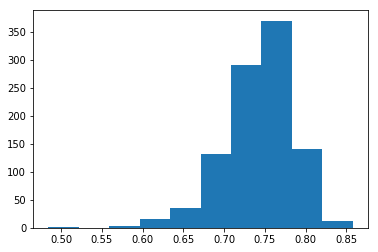

95.0 confidence interval 72.0% and 81.4%


In [42]:


# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 1000              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100)) #In 95 % it will have this accuracy in real world